IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\FAULT_M1_10


VOLO M1 FAULT 10%

In [3]:
rcou_m1_fault10 = pd.read_csv("RCOU.csv")
rcou_m1_fault10 = rcou_m1_fault10.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m1_fault10 = rcou_m1_fault10[((rcou_m1_fault10['C9'] >= 1400) & (rcou_m1_fault10['C10'] >= 1400) & (rcou_m1_fault10['C11'] >= 1400) & (rcou_m1_fault10['C12'] >= 1400) & (rcou_m1_fault10['C13'] >= 1400) & (rcou_m1_fault10['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m1_fault10)

,TimeUS,C9,C10,C11,C12,C13,C14
594,1648579931,1467,1420,1429,1459,1448,1441
597,1648611573,1436,1483,1442,1478,1413,1504
598,1648622390,1441,1490,1452,1479,1423,1506
599,1648632751,1473,1470,1445,1496,1444,1498
600,1648643260,1493,1459,1402,1542,1418,1530
...,...,...,...,...,...,...,...
9745,1749449310,1588,1411,1523,1488,1505,1507
9746,1749459761,1576,1423,1531,1477,1501,1508
9747,1749470298,1555,1447,1515,1492,1459,1545
9748,1749480739,1516,1484,1534,1465,1440,1556


In [4]:
xkf1_m1_fault10 = pd.read_csv("XKF1_0.csv")
xkf1_m1_fault10 = xkf1_m1_fault10.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m1_fault10 = xkf1_m1_fault10[((xkf1_m1_fault10['TimeUS'] >= 1648579931) & (xkf1_m1_fault10['TimeUS'] <= 1749491176))]
print(xkf1_m1_fault10)

          TimeUS  Roll  Pitch    Yaw
595   1648588414 -1.13   1.58  19.94
596   1648598616 -1.03   1.62  19.93
597   1648609223 -1.08   1.67  19.93
598   1648619701 -1.08   1.68  19.93
599   1648630504 -1.05   1.69  19.92
...          ...   ...    ...    ...
9748  1749447326 -1.54   0.06   6.15
9749  1749457351 -1.53   0.06   6.15
9750  1749468272 -1.50   0.07   6.16
9751  1749478311 -1.41   0.00   6.13
9752  1749489170 -1.21  -0.05   6.14

[9158 rows x 4 columns]


In [5]:
att_m1_fault10 = pd.read_csv("ATT.csv")
att_m1_fault10 = att_m1_fault10.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
att_m1_fault10 = att_m1_fault10[((att_m1_fault10['TimeUS'] >= 1648579931) & (att_m1_fault10['TimeUS'] <= 1749491176))]
print(att_m1_fault10)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
597   1648589763    -0.04 -1.13     -0.42   1.58   19.79  19.94
598   1648600108    -0.04 -1.03     -0.43   1.62   19.79  19.93
599   1648610781    -0.04 -1.08     -0.45   1.67   19.79  19.93
600   1648621728    -0.05 -1.08     -0.45   1.68   19.79  19.93
601   1648631845    -0.06 -1.05     -0.46   1.69   19.79  19.92
...          ...      ...   ...       ...    ...     ...    ...
9751  1749448579     0.73 -1.54     -0.31   0.06    8.12   6.15
9752  1749459114     0.74 -1.53     -0.32   0.06    8.12   6.15
9753  1749469562     0.75 -1.50     -0.34   0.07    8.12   6.16
9754  1749479836     0.76 -1.41     -0.34   0.00    8.12   6.13
9755  1749490199     0.75 -1.21     -0.33  -0.05    8.12   6.14

[9159 rows x 7 columns]


In [6]:
att_m1_fault10 = pd.merge_asof(att_m1_fault10,xkf1_m1_fault10, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m1_fault10)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     1648589763    -0.04 -1.13     -0.42   1.58   19.79  19.94
1     1648600108    -0.04 -1.03     -0.43   1.62   19.79  19.93
2     1648610781    -0.04 -1.08     -0.45   1.67   19.79  19.93
3     1648621728    -0.05 -1.08     -0.45   1.68   19.79  19.93
4     1648631845    -0.06 -1.05     -0.46   1.69   19.79  19.92
...          ...      ...   ...       ...    ...     ...    ...
9154  1749448579     0.73 -1.54     -0.31   0.06    8.12   6.15
9155  1749459114     0.74 -1.53     -0.32   0.06    8.12   6.15
9156  1749469562     0.75 -1.50     -0.34   0.07    8.12   6.16
9157  1749479836     0.76 -1.41     -0.34   0.00    8.12   6.13
9158  1749490199     0.75 -1.21     -0.33  -0.05    8.12   6.14

[9159 rows x 7 columns]


In [7]:
esc_0_m1_fault10 = pd.read_csv("ESC_0.csv")
esc_0_m1_fault10 = esc_0_m1_fault10.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
esc_0_m1_fault10 = esc_0_m1_fault10[((esc_0_m1_fault10['TimeUS'] >= 1648579931) & (esc_0_m1_fault10['TimeUS'] <= 1749491176))]
print(esc_0_m1_fault10)

         TimeUS   RPM  Curr
54   1648723327  3896  3.19
55   1648835311  5342  3.73
56   1648951745  5931  3.46
57   1649061187  6114  3.42
58   1649165235  6122  3.68
..          ...   ...   ...
897  1749047076  6246  3.40
898  1749156980  6076  2.90
899  1749265284  5870  2.39
900  1749365503  5711  2.88
901  1749472547  5617  3.20

[848 rows x 3 columns]


In [8]:
imu_2_m1_fault10 = pd.read_csv("IMU_2.csv")
imu_2_m1_fault10 = imu_2_m1_fault10.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
imu_2_m1_fault10 = imu_2_m1_fault10[((imu_2_m1_fault10['TimeUS'] >= 1648579931) & (imu_2_m1_fault10['TimeUS'] <= 1749491176))]
print(imu_2_m1_fault10)

           TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
2360   1648581601 -0.211782  0.056831 -0.012994  0.336502  0.421589  -9.942896
2361   1648584188 -0.107283  0.080737 -0.008679  0.274276  0.472594  -9.818870
2362   1648586823  0.120394  0.054659 -0.015943  0.228785  0.488832  -9.716087
2363   1648589594  0.248535  0.001177 -0.019928  0.194952  0.497481  -9.714005
2364   1648592629 -0.031576  0.018236  0.000477  0.181488  0.572292  -9.844906
...           ...       ...       ...       ...       ...       ...        ...
37156  1749479584  0.122205 -0.055954 -0.036314  0.623647  0.846220 -10.381050
37157  1749482701  0.219854 -0.080906 -0.021819  0.592933  0.738165 -10.306070
37158  1749485100  0.255042 -0.051175 -0.008229  0.590397  0.681750 -10.253930
37159  1749488276  0.252755 -0.054167 -0.000385  0.561656  0.693142 -10.216080
37160  1749490094  0.281972 -0.070295  0.031691  0.373961  0.684964 -10.319860

[34801 rows x 7 columns]


In [9]:
m1_fault10 = pd.merge_asof(att_m1_fault10, imu_2_m1_fault10, on="TimeUS",  tolerance= 100000)
print(m1_fault10)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0     1648589763    -0.04 -1.13     -0.42   1.58   19.79  19.94  0.248535   
1     1648600108    -0.04 -1.03     -0.43   1.62   19.79  19.93  0.199361   
2     1648610781    -0.04 -1.08     -0.45   1.67   19.79  19.93  0.000928   
3     1648621728    -0.05 -1.08     -0.45   1.68   19.79  19.93  0.000334   
4     1648631845    -0.06 -1.05     -0.46   1.69   19.79  19.92  0.051054   
...          ...      ...   ...       ...    ...     ...    ...       ...   
9154  1749448579     0.73 -1.54     -0.31   0.06    8.12   6.15  0.107550   
9155  1749459114     0.74 -1.53     -0.32   0.06    8.12   6.15  0.082013   
9156  1749469562     0.75 -1.50     -0.34   0.07    8.12   6.16  0.085620   
9157  1749479836     0.76 -1.41     -0.34   0.00    8.12   6.13  0.122205   
9158  1749490199     0.75 -1.21     -0.33  -0.05    8.12   6.14  0.281972   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.001177 -0

In [10]:
m1_fault10 = pd.merge_asof(esc_0_m1_fault10, m1_fault10, on="TimeUS",  tolerance= 100000)
print(m1_fault10)

         TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0    1648723327  3896  3.19    -0.10 -0.87     -0.66   1.73   19.79  20.02   
1    1648835311  5342  3.73    -0.70 -0.05     -1.01   1.00   19.80  20.02   
2    1648951745  5931  3.46    -1.49  0.43     -1.76  -0.76   19.81  20.70   
3    1649061187  6114  3.42    -2.48  0.28     -1.84  -2.67   19.81  21.96   
4    1649165235  6122  3.68    -3.54 -0.21     -1.40  -3.43   19.79  23.71   
..          ...   ...   ...      ...   ...       ...    ...     ...    ...   
843  1749047076  6246  3.40     0.48  0.13     -0.72  -0.87    8.12   8.62   
844  1749156980  6076  2.90     0.24 -0.29     -0.28  -1.04    8.13   7.50   
845  1749265284  5870  2.39     0.34 -1.21      0.09  -0.44    8.13   6.76   
846  1749365503  5711  2.88     0.63 -1.83     -0.08  -0.31    8.13   6.40   
847  1749472547  5617  3.20     0.75 -1.50     -0.34   0.07    8.12   6.16   

         GyrX      GyrY      GyrZ      AccX      AccY       Acc

In [11]:
m1_fault10["TimeUS"] = m1_fault10["TimeUS"] - m1_fault10.iloc[0]["TimeUS"]
m1_fault10["TimeUS"] = m1_fault10["TimeUS"].astype(int)
m1_fault10["Guasto"] = 2
print(m1_fault10)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0            0  3896  3.19    -0.10 -0.87     -0.66   1.73   19.79  20.02   
1       111984  5342  3.73    -0.70 -0.05     -1.01   1.00   19.80  20.02   
2       228418  5931  3.46    -1.49  0.43     -1.76  -0.76   19.81  20.70   
3       337860  6114  3.42    -2.48  0.28     -1.84  -2.67   19.81  21.96   
4       441908  6122  3.68    -3.54 -0.21     -1.40  -3.43   19.79  23.71   
..         ...   ...   ...      ...   ...       ...    ...     ...    ...   
843  100323749  6246  3.40     0.48  0.13     -0.72  -0.87    8.12   8.62   
844  100433653  6076  2.90     0.24 -0.29     -0.28  -1.04    8.13   7.50   
845  100541957  5870  2.39     0.34 -1.21      0.09  -0.44    8.13   6.76   
846  100642176  5711  2.88     0.63 -1.83     -0.08  -0.31    8.13   6.40   
847  100749220  5617  3.20     0.75 -1.50     -0.34   0.07    8.12   6.16   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  


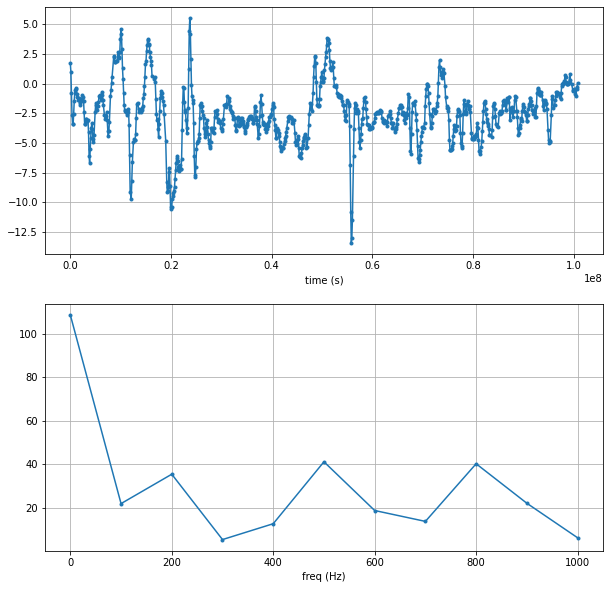

In [38]:
prova = m1_fault10.drop(["Yaw","RPM","DesRoll","DesPitch","Roll","DesYaw","Curr","GyrX","GyrY","GyrZ","AccX","AccY","AccZ","Guasto"], axis=1)

t = m1_fault10["TimeUS"]
y = m1_fault10["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


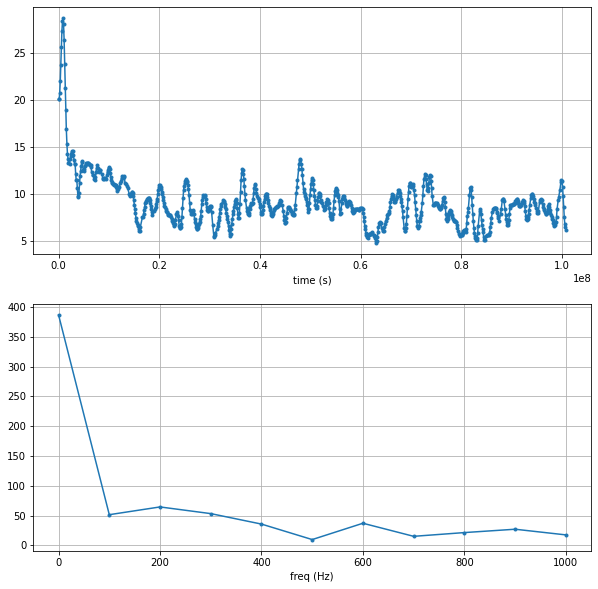

In [39]:
t = m1_fault10["TimeUS"]
y = m1_fault10["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

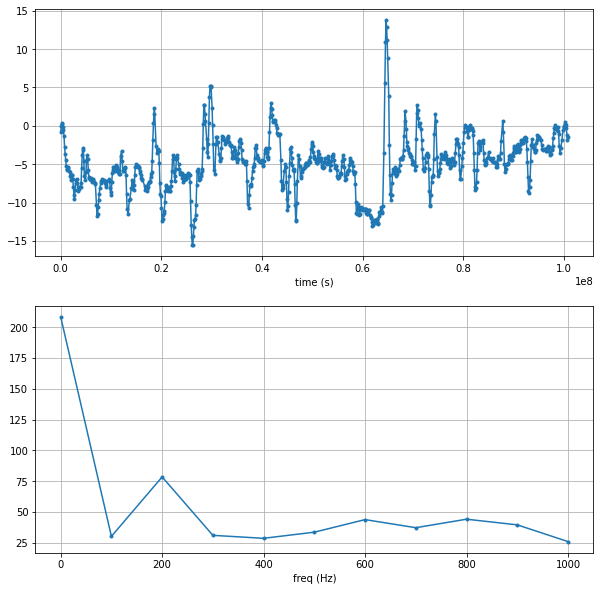

In [40]:
t = m1_fault10["TimeUS"]
y = m1_fault10["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

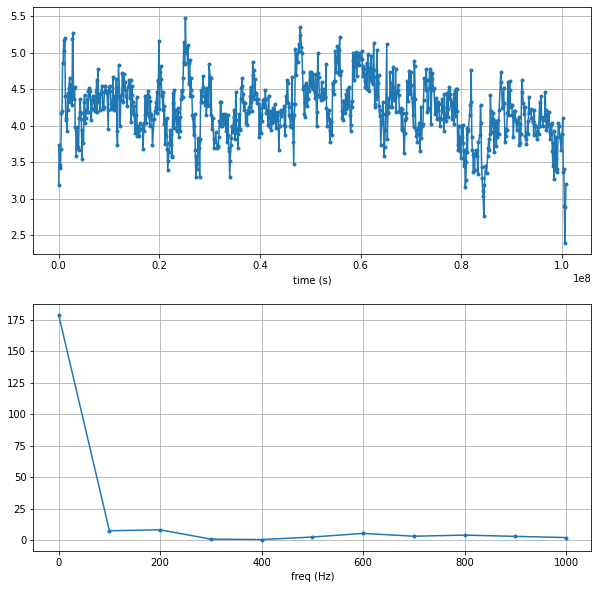

In [41]:
t = m1_fault10["TimeUS"]
y = m1_fault10["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

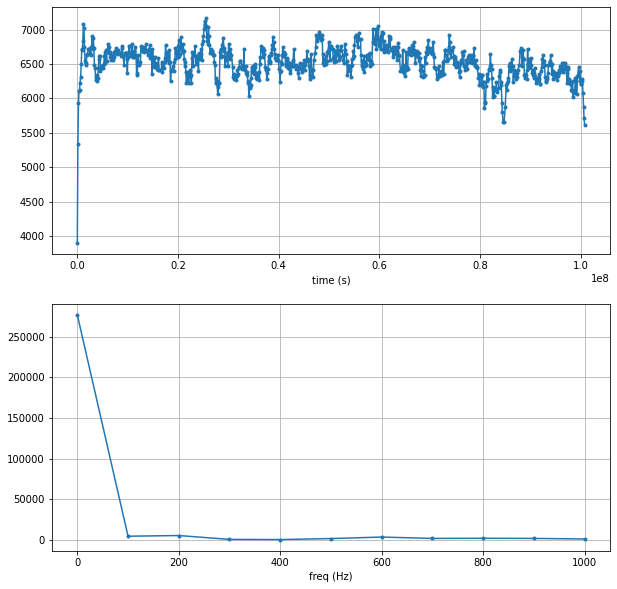

In [42]:
t = m1_fault10["TimeUS"]
y = m1_fault10["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

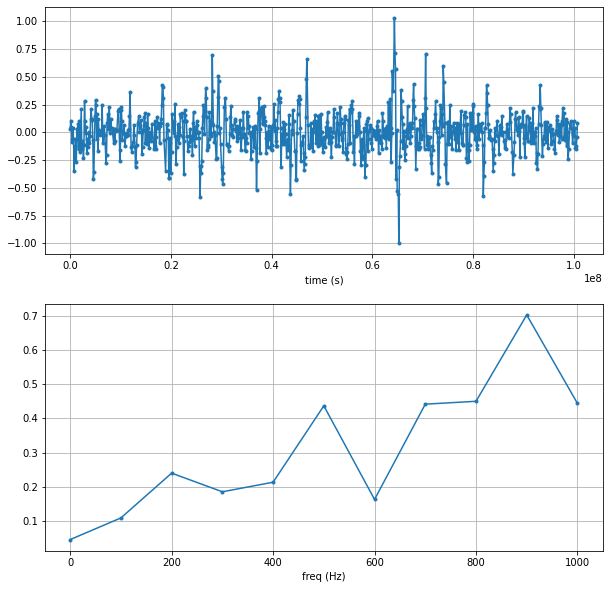

In [43]:
t = m1_fault10["TimeUS"]
y = m1_fault10["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

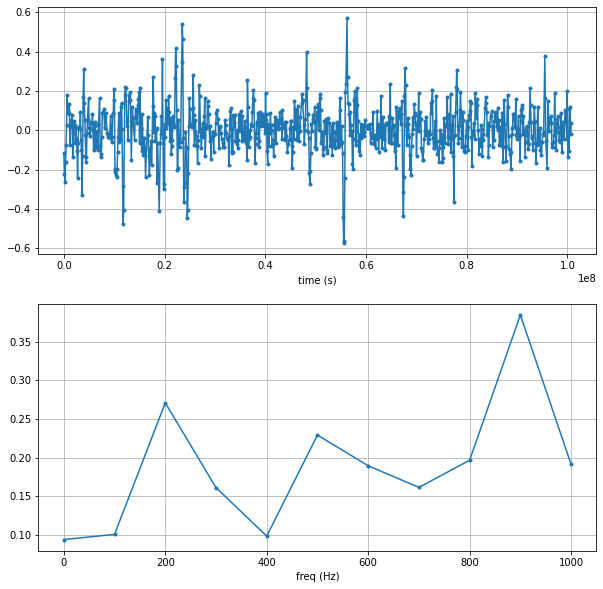

In [45]:
t = m1_fault10["TimeUS"]
y = m1_fault10["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

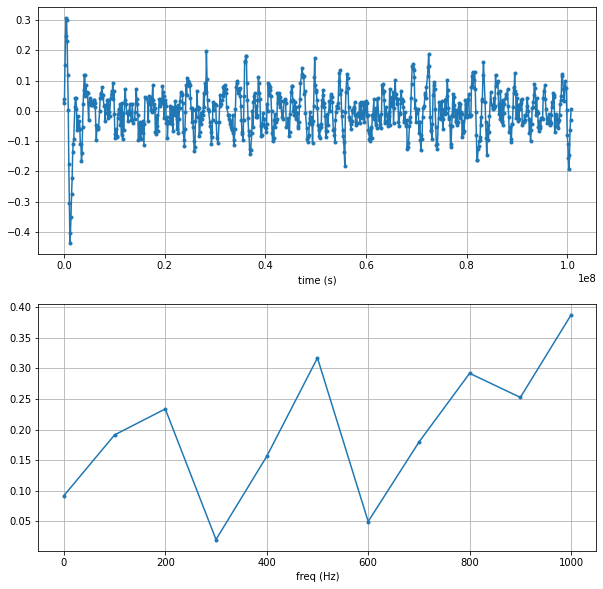

In [46]:
t = m1_fault10["TimeUS"]
y = m1_fault10["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

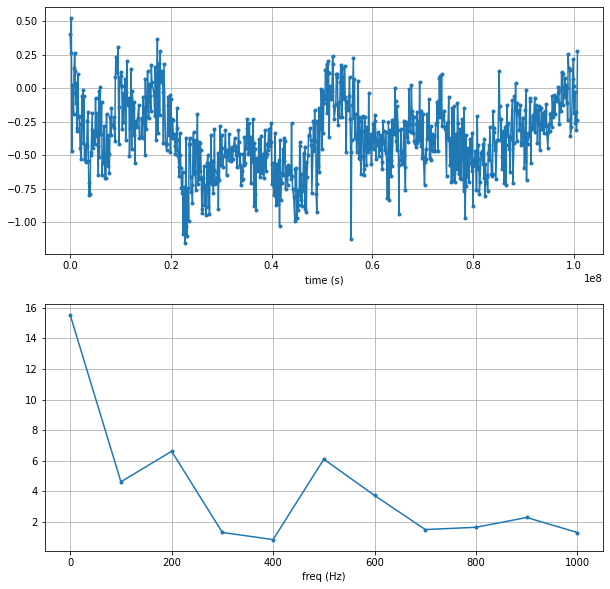

In [47]:
t = m1_fault10["TimeUS"]
y = m1_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

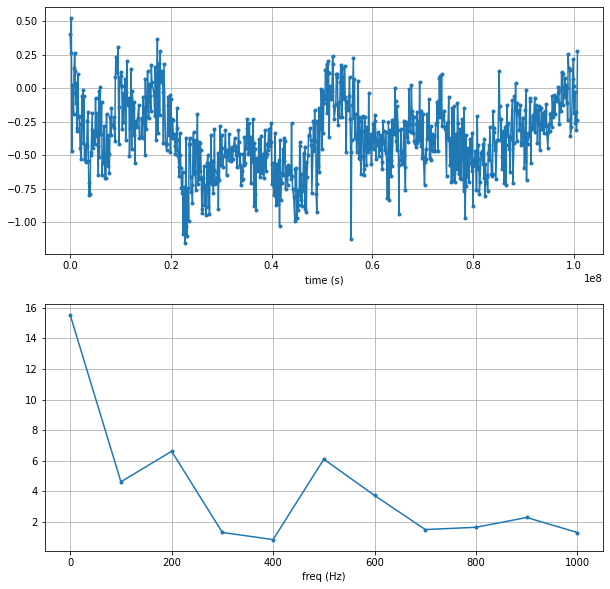

In [48]:
t = m1_fault10["TimeUS"]
y = m1_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

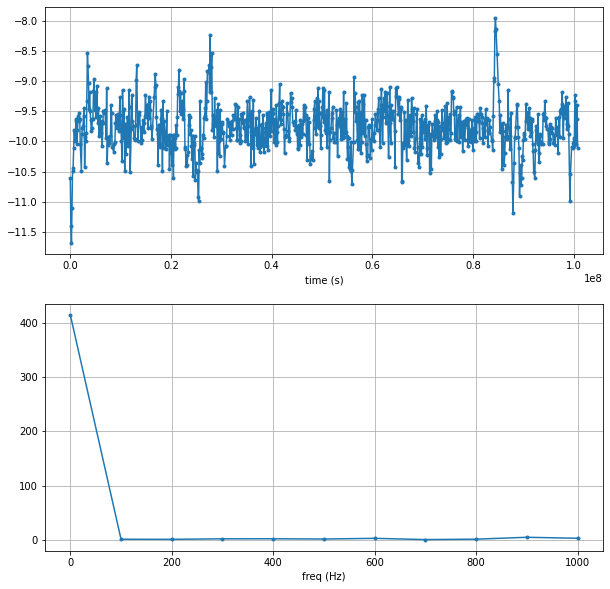

In [49]:
t = m1_fault10["TimeUS"]
y = m1_fault10["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

In [12]:
path_file = path_file.replace(r"M1\FAULT_M1_10", "")
os.chdir(path_file)
m1_fault10.to_csv('m1_fault10.csv', index=False)
print(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\
